In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Data


In [132]:
import pandas as pd
import datetime as dt

df = pd.read_csv("/content/drive/My Drive/48_Industry_Portfolios_daily.CSV", parse_dates=["Date"])

df = df.drop(df.index[:(24643-63)]) 

df.dropna(inplace=True)

df.reset_index(drop = True, inplace=True)

df.Date = pd.to_datetime(df.Date, format='%Y%m%d')

df

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,Hlth,MedEq,Drugs,Chems,Rubbr,Txtls,BldMt,Cnstr,Steel,FabPr,Mach,ElcEq,Autos,Aero,Ships,Guns,Gold,Mines,Coal,Oil,Util,Telcm,PerSv,BusSv,Comps,Chips,LabEq,Paper,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,2019-10-02,-2.05,-1.58,-2.78,-2.20,-1.77,-1.51,-0.76,-1.51,-2.14,-1.65,-1.34,-1.82,-1.16,-1.61,-1.75,-1.81,-1.59,-0.63,-2.48,-1.62,-1.79,-3.11,-2.29,-2.06,-3.09,-1.54,1.11,-2.37,0.55,-2.74,-1.31,-1.00,-1.12,-1.72,-1.72,-1.96,-2.24,-1.55,-2.10,-1.98,-1.40,-1.66,-1.59,-1.99,-1.38,-2.07,-2.36,-1.61
1,2019-10-03,-0.26,0.72,1.36,1.22,0.62,2.46,0.10,-0.69,0.49,0.71,0.47,1.61,1.22,0.53,0.58,1.65,0.39,0.11,0.24,-0.78,0.59,1.14,-0.38,0.91,0.26,0.42,0.52,0.26,0.58,1.34,0.35,0.20,0.24,1.40,1.01,1.30,1.34,-0.14,0.14,0.53,0.06,0.38,0.85,0.37,0.12,0.41,-0.01,0.76
2,2019-10-04,-2.69,1.51,1.40,1.32,2.00,0.51,1.10,1.37,1.71,1.07,1.22,1.28,1.36,0.60,1.37,1.31,1.41,1.97,0.99,0.65,1.37,1.15,0.21,1.14,-0.25,1.26,0.59,0.67,0.11,0.59,1.45,1.34,0.16,1.47,0.38,2.17,2.09,0.58,1.49,0.94,0.74,1.03,0.91,1.77,1.89,1.28,1.88,1.20
3,2019-10-07,0.47,-0.72,-1.28,-1.44,-0.38,-0.07,-0.21,-0.65,-0.90,-0.25,0.25,-0.85,-0.34,-0.61,-0.31,0.14,-0.99,-0.38,-0.76,-1.14,-0.82,-1.04,-0.08,0.03,-0.66,-0.31,-0.09,0.09,-0.72,-0.92,-0.50,0.28,-0.32,-0.30,0.21,-0.37,-0.91,-1.13,-0.27,-0.15,-0.39,-0.36,-0.36,-0.40,-0.50,-0.26,-0.46,-0.41
4,2019-10-08,0.66,-1.26,-0.48,-0.74,-0.78,-0.34,-1.78,-3.19,-1.56,-1.24,-2.00,-2.78,-1.35,-2.27,-1.85,-1.36,-1.46,-0.37,-1.90,-1.93,-2.17,-2.26,-1.59,-0.86,-1.68,-0.49,2.03,-1.12,-2.29,-1.71,-1.17,-1.08,-1.86,-1.68,-2.55,-1.83,-3.97,-1.96,-1.60,-1.93,-1.08,-0.92,-0.84,-2.06,-1.72,-1.41,-1.64,-1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-06-24,-4.35,-1.61,-2.35,-1.99,-2.08,-3.61,-3.23,-2.94,-1.57,-2.82,-3.67,-4.39,-2.02,-3.10,-1.21,-4.37,-4.11,-3.87,-4.61,-4.37,-2.96,-3.24,-3.96,-4.97,-5.21,-3.10,-1.05,-2.85,-0.80,-5.62,-1.27,-2.26,-3.73,-2.53,-2.08,-1.90,-2.91,-3.16,-2.69,-3.50,-3.38,-1.41,-2.32,-4.12,-3.26,-5.29,-3.32,-2.70
184,2020-06-25,0.74,0.45,0.79,0.96,0.73,0.16,0.80,1.13,0.92,0.70,1.62,0.21,1.30,1.88,1.47,-0.16,1.60,-0.24,2.37,2.86,1.69,1.52,1.79,-0.38,1.24,0.97,0.37,1.67,-0.18,1.93,-0.92,0.36,-0.35,1.29,0.76,1.00,1.26,1.07,0.35,1.00,0.76,0.34,-0.32,2.83,2.17,2.04,2.30,1.25
185,2020-06-26,-1.04,-1.96,-2.78,-1.99,-3.01,-0.69,-4.54,-1.34,-1.93,-5.13,-1.31,-0.79,-1.48,-1.82,-1.03,-2.89,-0.97,-1.88,-3.17,4.46,-1.81,-0.88,-2.30,-2.55,-2.65,-1.49,1.21,-2.25,-3.91,-3.64,-1.37,-2.18,-1.87,-2.72,0.43,-2.49,-1.42,-1.34,-1.19,-2.56,-1.86,-1.79,-2.21,-4.86,-2.68,-3.14,-4.21,-1.94
186,2020-06-29,1.22,1.50,1.80,2.01,2.53,0.48,1.83,2.08,2.08,3.29,1.63,1.66,0.26,2.36,1.90,5.41,3.57,3.54,3.40,4.25,2.30,2.56,4.23,7.81,3.00,2.87,0.53,2.13,2.41,1.65,1.93,2.19,3.12,1.00,0.74,1.77,1.11,2.39,2.59,2.65,2.94,0.78,2.62,1.64,1.42,2.62,1.20,1.55


In [133]:
import random

cols = df.columns.tolist()

cols.remove('Date')

random.shuffle(cols) # randomize the sequence of the columns

cols.insert(0, "Date")

cols

['Date',
 'Fin  ',
 'PerSv',
 'Books',
 'Boxes',
 'Trans',
 'BldMt',
 'Meals',
 'Toys ',
 'LabEq',
 'Comps',
 'Whlsl',
 'Agric',
 'Autos',
 'Other',
 'Ships',
 'Oil  ',
 'Chips',
 'Util ',
 'Telcm',
 'Food ',
 'Txtls',
 'Mines',
 'BusSv',
 'Drugs',
 'Soda ',
 'Banks',
 'Gold ',
 'Aero ',
 'Rubbr',
 'Paper',
 'ElcEq',
 'Steel',
 'FabPr',
 'Hlth ',
 'Hshld',
 'MedEq',
 'Fun  ',
 'Guns ',
 'Clths',
 'Rtail',
 'Cnstr',
 'Mach ',
 'Beer ',
 'Chems',
 'Coal ',
 'RlEst',
 'Insur',
 'Smoke']

In [134]:
df = df[cols]

df

,Date,Fin,PerSv,Books,Boxes,Trans,BldMt,Meals,Toys,LabEq,Comps,Whlsl,Agric,Autos,Other,Ships,Oil,Chips,Util,Telcm,Food,Txtls,Mines,BusSv,Drugs,Soda,Banks,Gold,Aero,Rubbr,Paper,ElcEq,Steel,FabPr,Hlth,Hshld,MedEq,Fun,Guns,Clths,Rtail,Cnstr,Mach,Beer,Chems,Coal,RlEst,Insur,Smoke
0,2019-10-02,-2.36,-1.12,-1.51,-2.10,-1.98,-1.59,-1.59,-1.51,-2.24,-1.72,-1.40,-2.05,-2.29,-1.61,-3.09,-2.74,-1.96,-1.31,-1.00,-1.58,-1.81,-2.37,-1.72,-1.16,-2.78,-1.99,1.11,-2.06,-1.75,-1.55,-3.11,-2.48,-1.62,-1.34,-2.14,-1.82,-0.76,-1.54,-1.65,-1.66,-0.63,-1.79,-2.20,-1.61,0.55,-2.07,-1.38,-1.77
1,2019-10-03,-0.01,0.24,-0.69,0.14,0.53,0.39,0.85,2.46,1.34,1.01,0.06,-0.26,-0.38,0.76,0.26,1.34,1.30,0.35,0.20,0.72,1.65,0.26,1.40,1.22,1.36,0.37,0.52,0.91,0.58,-0.14,1.14,0.24,-0.78,0.47,0.49,1.61,0.10,0.42,0.71,0.38,0.11,0.59,1.22,0.53,0.58,0.41,0.12,0.62
2,2019-10-04,1.88,0.16,1.37,1.49,0.94,1.41,0.91,0.51,2.09,0.38,0.74,-2.69,0.21,1.20,-0.25,0.59,2.17,1.45,1.34,1.51,1.31,0.67,1.47,1.36,1.40,1.77,0.59,1.14,1.37,0.58,1.15,0.99,0.65,1.22,1.71,1.28,1.10,1.26,1.07,1.03,1.97,1.37,1.32,0.60,0.11,1.28,1.89,2.00
3,2019-10-07,-0.46,-0.32,-0.65,-0.27,-0.15,-0.99,-0.36,-0.07,-0.91,0.21,-0.39,0.47,-0.08,-0.41,-0.66,-0.92,-0.37,-0.50,0.28,-0.72,0.14,0.09,-0.30,-0.34,-1.28,-0.40,-0.09,0.03,-0.31,-1.13,-1.04,-0.76,-1.14,0.25,-0.90,-0.85,-0.21,-0.31,-0.25,-0.36,-0.38,-0.82,-1.44,-0.61,-0.72,-0.26,-0.50,-0.38
4,2019-10-08,-1.64,-1.86,-3.19,-1.60,-1.93,-1.46,-0.84,-0.34,-3.97,-2.55,-1.08,0.66,-1.59,-1.77,-1.68,-1.71,-1.83,-1.17,-1.08,-1.26,-1.36,-1.12,-1.68,-1.35,-0.48,-2.06,2.03,-0.86,-1.85,-1.96,-2.26,-1.90,-1.93,-2.00,-1.56,-2.78,-1.78,-0.49,-1.24,-0.92,-0.37,-2.17,-0.74,-2.27,-2.29,-1.41,-1.72,-0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-06-24,-3.32,-3.73,-2.94,-2.69,-3.50,-4.11,-2.32,-3.61,-2.91,-2.08,-3.38,-4.35,-3.96,-2.70,-5.21,-5.62,-1.90,-1.27,-2.26,-1.61,-4.37,-2.85,-2.53,-2.02,-2.35,-4.12,-1.05,-4.97,-1.21,-3.16,-3.24,-4.61,-4.37,-3.67,-1.57,-4.39,-3.23,-3.10,-2.82,-1.41,-3.87,-2.96,-1.99,-3.10,-0.80,-5.29,-3.26,-2.08
184,2020-06-25,2.30,-0.35,1.13,0.35,1.00,1.60,-0.32,0.16,1.26,0.76,0.76,0.74,1.79,1.25,1.24,1.93,1.00,-0.92,0.36,0.45,-0.16,1.67,1.29,1.30,0.79,2.83,0.37,-0.38,1.47,1.07,1.52,2.37,2.86,1.62,0.92,0.21,0.80,0.97,0.70,0.34,-0.24,1.69,0.96,1.88,-0.18,2.04,2.17,0.73
185,2020-06-26,-4.21,-1.87,-1.34,-1.19,-2.56,-0.97,-2.21,-0.69,-1.42,0.43,-1.86,-1.04,-2.30,-1.94,-2.65,-3.64,-2.49,-1.37,-2.18,-1.96,-2.89,-2.25,-2.72,-1.48,-2.78,-4.86,1.21,-2.55,-1.03,-1.34,-0.88,-3.17,4.46,-1.31,-1.93,-0.79,-4.54,-1.49,-5.13,-1.79,-1.88,-1.81,-1.99,-1.82,-3.91,-3.14,-2.68,-3.01
186,2020-06-29,1.20,3.12,2.08,2.59,2.65,3.57,2.62,0.48,1.11,0.74,2.94,1.22,4.23,1.55,3.00,1.65,1.77,1.93,2.19,1.50,5.41,2.13,1.00,0.26,1.80,1.64,0.53,7.81,1.90,2.39,2.56,3.40,4.25,1.63,2.08,1.66,1.83,2.87,3.29,0.78,3.54,2.30,2.01,2.36,2.41,2.62,1.42,2.53


Data Transformation

In [228]:
import numpy as np

p = 48 #number of assets

original_R = df.iloc[:,1:1+p].values

R = original_R - np.mean(original_R) # demean

identity_matrix = np.identity(p-1)

ones = np.repeat(-1, p-1)

N = np.row_stack((identity_matrix, ones))

X = np.dot(R, N)

print (R.shape)
print (N)
print (X.shape)

(188, 48)
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [-1. -1. -1. ... -1. -1. -1.]]
(188, 47)


In [229]:
W_EW = np.repeat(1/p, p).reshape(-1,1)

y = np.dot(R, W_EW)

y.shape

(188, 1)

# Moving Window

In [230]:
train_X_list = []
train_y_list = []
return_list = []
y_true = []

observations = 63

for i in range(observations, len(df)):
    
    train_X_list.append(X[i-observations:i])
    
    train_y_list.append(y[i-observations:i])
    
    return_list.append(original_R[i])

    y_true.append(y[i])

len(y_true)

125

# Debugging 

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [38]:
model = model.fit(train_X_list[0], train_y_list[0]) # 1st set of 63 observations (Before 1st Jan)

In [39]:
model.score(train_X_list[0], train_y_list[0])

0.4209346574075487

In [40]:
beta = model.coef_

beta

array([[ 0.02924756, -0.27089319,  0.07476694,  0.05566779, -0.08379659]])

In [41]:
weight = W_EW - np.dot(N, beta.reshape(-1,1))

weight

array([[ 0.13741911],
       [ 0.43755985],
       [ 0.09189972],
       [ 0.11099888],
       [ 0.25046326],
       [-0.02834083]])

In [42]:
np.dot(original_R[63], weight)

array([-1.23149844])

# Lasso

6 Industries

Text(0, 0.5, 'mean-squared-error')

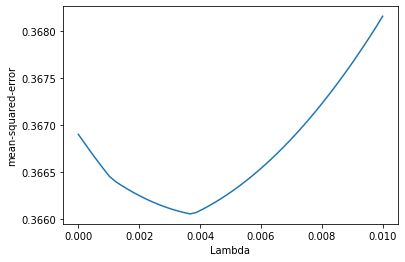

In [210]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-10, 0.01)

model = LassoCV(cv=10, max_iter=10000, alphas=alphas)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

24 Industries

Text(0, 0.5, 'mean-squared-error')

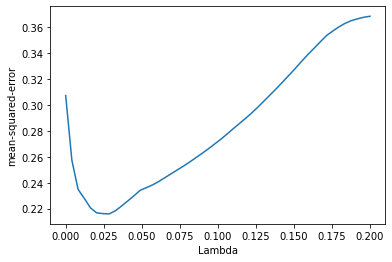

In [197]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-10, 0.2)

model = LassoCV(cv=10, max_iter=10000, alphas=alphas)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

48 Industries

Text(0, 0.5, 'mean-squared-error')

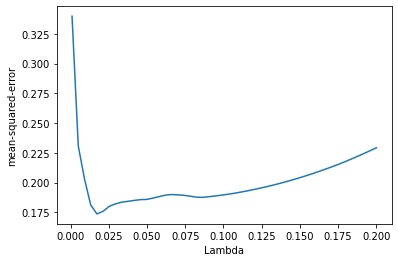

In [236]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-3, 0.2)

model = LassoCV(cv=10, max_iter=100000, alphas=alphas)

model = model.fit(train_X_list[0], train_y_list[0].ravel())

lambda_used_L = model.alphas_

mse_list = np.mean(model.mse_path_, axis = 1)

plt.plot(lambda_used_L, mse_list)
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

# Ridge

6 Industries

Text(0, 0.5, 'mean-squared-error')

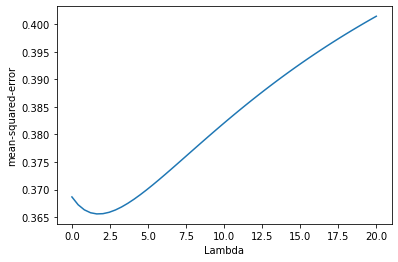

In [139]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-3, 20)

model = RidgeCV(alphas=alphas, store_cv_values=True)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

24 Industries

Text(0, 0.5, 'mean-squared-error')

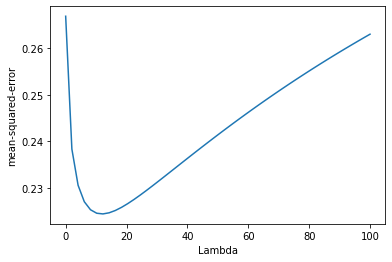

In [118]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(1e-3, 100)

model = RidgeCV(alphas=alphas, store_cv_values=True)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

48 Industries

Text(0, 0.5, 'mean-squared-error')

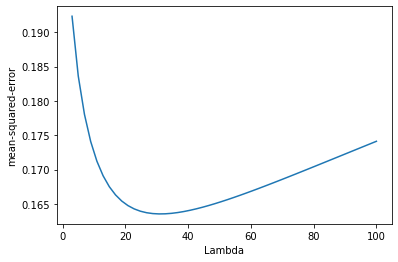

In [237]:
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

alphas = np.linspace(3, 100)

model = RidgeCV(alphas=alphas, store_cv_values=True)

model = model.fit(train_X_list[0], train_y_list[0])

mse = model.cv_values_

mse_list = np.mean(mse, axis = 0)

plt.plot(alphas, mse_list.ravel())
plt.xlabel("Lambda")
plt.ylabel("mean-squared-error")

# MinVar Portfolio

In [64]:
from sklearn.linear_model import LinearRegression

result_beta_mv = []
result_weight_mv = []
total_ret_mv = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  model = LinearRegression()
  model = model.fit(X_train, y_train)
  
  beta = model.coef_
  result_beta_mv.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_mv.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_mv.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [67]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_mv))**2

print(in_sample_variance/out_of_sample_variance)

0.55800553346943


In [68]:
np.sum(total_ret_mv) # total returns over 6 months

-50.944324821975556

# Lasso Portfolio

In [73]:
from sklearn.linear_model import LassoCV

result_beta_ls = []
result_weight_ls = []
total_ret_ls = []
lambda_list_ls = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  model = LassoCV(cv=10, max_iter=10000)
  model = model.fit(X_train, y_train.ravel())

  lambda_list_ls.append(model.alpha_)
  
  beta = model.coef_
  result_beta_ls.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_ls.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_ls.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [74]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_ls))**2

print(in_sample_variance/out_of_sample_variance) # R^2 OS

1.5496789091445815


In [75]:
np.sum(total_ret_ls)

-17.752924918920204

# Ridge Portfolio

In [79]:
from sklearn.linear_model import RidgeCV

result_beta_rd = []
result_weight_rd = []
total_ret_rd = []
lambda_list_rd = []
in_sample_variance_list = []

for X_train, y_train, ret in zip(train_X_list, train_y_list, return_list):
  model = RidgeCV(cv=10, alphas=np.linspace(1e-3, 100))
  model = model.fit(X_train, y_train.ravel())

  lambda_list_rd.append(model.alpha_)
  
  beta = model.coef_
  result_beta_rd.extend(beta)

  weight = W_EW - np.dot(N, beta.reshape(-1,1))
  result_weight_rd.append(weight)

  ret_OS =  np.dot(ret, weight)
  total_ret_rd.extend(ret_OS)

  in_sample_variance_list.append((np.std(y_train))**2)

In [80]:
in_sample_variance = np.mean(in_sample_variance_list)

out_of_sample_variance = (np.std(total_ret_rd))**2

print(in_sample_variance/out_of_sample_variance) # R^2 OS

2.1011527110690347


In [81]:
np.sum(total_ret_rd)

-10.996704183637059

# Equal Weight

In [82]:
np.array(return_list).shape

(125, 48)

In [83]:
total_ret_ew = np.dot(np.array(return_list), W_EW)

total_ret_ew.shape

(125, 1)

In [84]:
np.sum(total_ret_ew)

-3.655208333333337